Join the data from Part 1 with the data from Part 2 to create a new dataframe.

#Couldn't generate Yelp API so couldn't generate another Yelp Dataframe. Instead, I joined foursquare data with df-barcelona2 information

In [1]:
# imports
import pandas as pd   

df_foursquare = pd.read_csv("../Downloads/foursquare_interests.csv")  
df_barcelona2 = pd.read_csv("../Downloads/barcelona_bikes.csv")            

In [2]:
#Join the data from Part 1 with the data from Part 2 to create a new dataframe.
data_all = pd.merge(df_foursquare, df_barcelona2, on=['Latitude','Longitude']) #Used only foursquare data for subsequent analysis
data_all    

,Latitude,Longitude,Average_dist_F,Average_popularity_F,Average_rating_F,Max_rating_F,Max_popularity_F,Min_rating_F,Min_popularity_F,Station Name,Number of Bikes
0,41.388125,2.195187,702.9,0.989557,8.95,9.3,0.999425,8.7,0.972362,"C/ MARINA, 25-33",14
1,41.436687,2.169313,830.9,0.866251,8.40,8.6,0.984181,8.2,0.503398,"C/ MARIE CURIE, 8-14",8
2,41.409135,2.208818,779.8,0.980499,8.66,9.1,0.996439,8.5,0.961010,"C/ SELVA DE MAR, 46",5
3,41.389462,2.131495,595.3,0.958578,8.79,9.1,0.998132,8.6,0.885793,"AV. DIAGONAL, 652",0
4,41.391767,2.153216,725.0,0.988464,9.22,9.4,0.999966,9.1,0.948650,"C/ CÒRSEGA, 216",0
...,...,...,...,...,...,...,...,...,...,...,...
503,41.375185,2.159239,675.2,0.989664,9.17,9.3,0.999932,9.1,0.969424,"AV. PARAL·LEL, 146 BIS",23
504,41.383261,2.139266,668.0,0.969746,9.01,9.2,0.998132,8.8,0.937312,"C/ BERLÍN, 38",3
505,41.387306,2.163126,541.2,0.988022,9.25,9.4,0.999966,9.2,0.948650,"C/ DIPUTACIÓ, 226",6
506,41.398754,2.190212,726.4,0.973419,9.11,9.4,0.997935,8.9,0.894586,"C/ SANCHO DE ÁVILA, 60-64",10


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns   

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


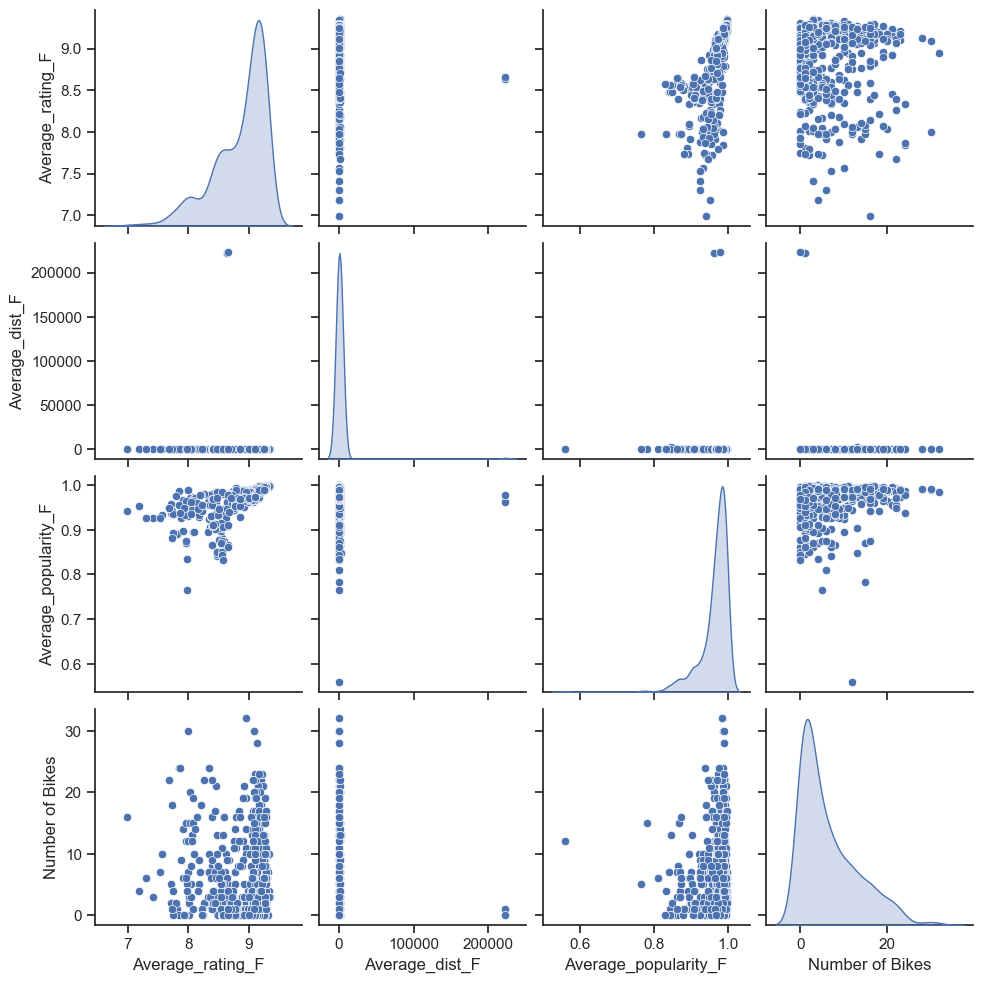

In [5]:
#Used only foursquare data for subsequent analysis
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_all, diag_kind="kde", vars=['Average_rating_F','Average_dist_F','Average_popularity_F','Number of Bikes'])
plt.savefig('../Downloads/pairplot.png', dpi=300, bbox_inches='tight')
plt.show()  
     

In [7]:
df_selectfeatures = data_all[['Average_rating_F','Average_dist_F','Average_popularity_F','Number of Bikes']]  

In [8]:
# Specify the file path for the CSV
csv_file_path = "../Downloads/selectfeatures.csv"
# Save the DataFrame to CSV
df_selectfeatures.to_csv(csv_file_path, index=False) 

In [10]:
correlation_matrix = df_selectfeatures.corr(numeric_only=True)
correlation_matrix  

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
Average_rating_F,1.000000,-0.037368,0.647751,-0.004235
Average_dist_F,-0.037368,1.000000,0.007576,-0.068405
Average_popularity_F,0.647751,0.007576,1.000000,0.150654
Number of Bikes,-0.004235,-0.068405,0.150654,1.000000


There doesn't seem to be a strong correlation between number of available bikes at a Barcelona bike station and the average rating, popularity or distance of restaurants and bars within 1000m radius of the bike station.

Plot heatmap to visualize correlation matrix

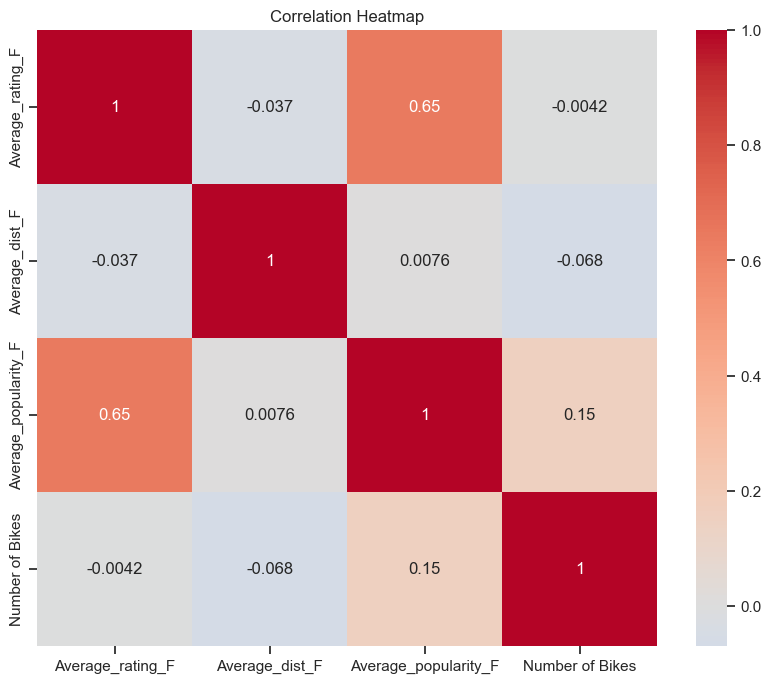

In [11]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../Downloads/heatmap_fq.jpg', dpi=300, bbox_inches='tight')
plt.show() 

There doesn't seem to be a strong correlation between number of available bikes at a Barcelona bike station and the average rating, popularity or distance of restaurants and bars within 1000m radius of the bike station.

However, some outliers detected in Average_rating_F, Average_dist_F could be affecting the analysis. To circumvent this, I will remove the outliers and rerun the analysis.

<Axes: >

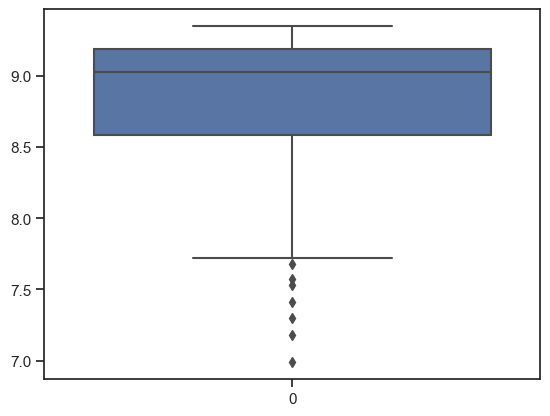

In [26]:
import seaborn as sns
sns.boxplot(data_all['Average_rating_F'])        

In [66]:
df_selectfeatures = data_all[['Average_rating_F','Average_dist_F','Average_popularity_F','Number of Bikes']]       

In [67]:
#Remove possible outliers
import pandas as pd
import numpy as np
from scipy import stats


#find Q1, Q3, and interquartile range for each column
Q1 = df_selectfeatures.quantile(q=.25)
Q3 = df_selectfeatures.quantile(q=.75)
IQR = df_selectfeatures.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = df_selectfeatures[~((df_selectfeatures < (Q1-1.5*IQR)) | (df_selectfeatures > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.describe()    

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
count,422.000000,422.000000,422.000000,422.000000
mean,8.940877,676.959479,0.975643,6.428910
std,0.366281,90.375833,0.019034,6.214948
min,7.720000,425.800000,0.911584,0.000000
25%,8.782500,615.475000,0.965722,1.000000
50%,9.075000,680.450000,0.981341,4.000000
75%,9.210000,743.600000,0.990727,10.000000
max,9.350000,914.100000,0.998757,23.000000


In [68]:
# Specify the file path for the CSV
csv_file_path = "../Downloads/data_clean.csv"
# Save the DataFrame to CSV
data_clean.to_csv(csv_file_path, index=False)    

In [69]:
correlation_matrix = data_clean.corr(numeric_only=True)
correlation_matrix      

,Average_rating_F,Average_dist_F,Average_popularity_F,Number of Bikes
Average_rating_F,1.000000,-0.029710,0.749818,0.011500
Average_dist_F,-0.029710,1.000000,-0.022423,-0.069532
Average_popularity_F,0.749818,-0.022423,1.000000,0.226050
Number of Bikes,0.011500,-0.069532,0.226050,1.000000


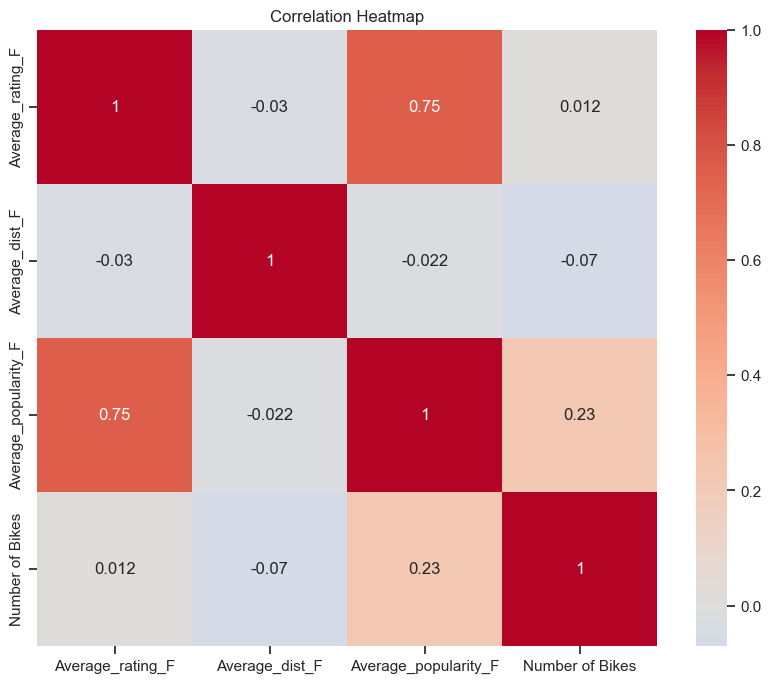

In [70]:
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Correlation Heatmap")
plt.savefig('../Downloads/heatmap_fq.jpg', dpi=300, bbox_inches='tight')
plt.show()       

Still, there doesn't seem to be a strong correlation between number of available bikes at a Barcelona bike station and the average rating, popularity or distance of restaurants and bars within 1000m radius of the bike station.

In [71]:
# Re-specify the file path for the CSV
csv_file_path = "../Downloads/data_clean.csv"
# Save the DataFrame to CSV
data_clean.to_csv(csv_file_path, index=False)    

 Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [31]:
import sqlite3
from sqlite3 import Error  

In [37]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection  

In [42]:
 connection_data = create_connection("../Downloads/bikes_poi.sqlite")

# Write the DataFrames to the database
data_foursquare.to_sql('foursquare', connection_data, if_exists='replace', index=False)
data_yelp.to_sql('yelp', connection_data, if_exists='replace', index=False)
df_barcelona2.to_sql('bikes', connection_data, if_exists='replace', index=False)

# Close database connection
connection_data.close()     

Connection to SQLite DB successful


In [45]:
def implement_query(connection_data, query):
    cursor = connection_data.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")  

In [46]:
connection_data = create_connection("../Downloads/bikes_poi.sqlite")

select_bikes = "SELECT * FROM bikes"
bikes = implement_query(connection_data, select_bikes)

for station in bikes:
    print(station)

connection_data.close()  

Connection to SQLite DB successful
('C/ MARINA, 25-33', 41.3881248, 2.1951871, 20)
('C/ MARIE CURIE, 8-14', 41.4366871, 2.1693134, 1)
('C/ SELVA DE MAR, 46', 41.4091355, 2.2088179, 10)
('AV. DIAGONAL, 652', 41.389462, 2.1314948, 2)
('C/ CÒRSEGA, 216', 41.3917666, 2.1532163, 0)
('C/ CARDENAL TEDESCHINI, 13', 41.4253643, 2.1852073, 4)
("RAMBLA DE L'ONZE DE SETEMBRE, 69", 41.4299999, 2.190246, 11)
('C/ DURAN I BAS, 2', 41.3854094, 2.1740155, 4)
('PG. TORRAS I BAGES, 129', 41.4433647, 2.1906302, 9)
('GRAN VIA DE LES CORTS CATALANES, 902', 41.4075013, 2.1930174, 0)
('C/ GÒNGORA, 23', 41.4432762, 2.1746238, 1)
('C/ GRAN DE LA SAGRERA, 74', 41.4230551, 2.1913753, 11)
('C/ SANT ISCLE, 60', 41.433384, 2.1716309, 1)
('C/ MALLORCA, 41-43', 41.3834802, 2.1482099, 2)
('C/ FULTON, 1', 41.4297231, 2.1617032, 1)
('RECINTE PARC DE LA CIUTADELLA', 41.3873901, 2.1875446, 6)
('C/ SANT OLEGUER, 2', 41.3775319, 2.1707321, 12)
('RAMBLA DEL RAVAL, 20', 41.3781065, 2.1696744, 17)
('RAMBLA DEL BRASIL, 44', 41.3

Look at the data before and after the join to validate your data.